#### *Farid Rahimli*
#### *GH1029730*
#### *M516*
#### *Business Project in Big Data & AI*

# **Project Overview**
---
#### *Notebook develops the machine-learning/AI model to classify high energy particles read by the MAGIC Gamma Telescope.*
---
#### **Business Problem**
#### *Main idea of this project is to procure highly efficient and accurate model that is able to distinguish between gamma-ray signals which are very valuable for scientific purposes named as a class (`g`) and background noise or hadronic showers that do not carry any useful information named (`h`) Enabling this classification will directly affect scientific value of the telescope as well as improve the ROI of the whole facility due to improved timeliness*
---
#### **Method**
- #### *Fetch and PreProcess the telescope data from UCI repository.*
- #### *Conduct EDA \\ Understand correlation and distribution of features.*
- #### *Construct tune and train baseline traditional model (XGBoost)*
- #### *Construct tune and train deep learning model (keral MLP)*
- #### *Compare evaluate and Conclude*
---

# **Data Loading and Preprocessing**

#### *Loading necessary libraries*

In [95]:
# core libraries and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data fetching libraries
from ucimlrepo import fetch_ucirepo 

#data handling and metrics libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay

#model libraries
from xgboost import XGBClassifier
#visualization options
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (10, 6)

#### *Loading the dataset*

In [96]:
#fetch data
magic_gamma_telescope = fetch_ucirepo(id=159)

#split features and target variable
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

In [97]:
X

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [98]:
y

,class
0,g
1,g
2,g
3,g
4,g
...,...
19015,h
19016,h
19017,h
19018,h


#### *Consolidate data into dataframe*

In [99]:
#create new df
df = X.copy()

In [100]:
#add the target variable
df['class'] = y['class']

In [101]:
#metadata and information on variables
print(magic_gamma_telescope.variables)

        name     role        type demographic  \
0    fLength  Feature  Continuous        None   
1     fWidth  Feature  Continuous        None   
2      fSize  Feature  Continuous        None   
3      fConc  Feature  Continuous        None   
4     fConc1  Feature  Continuous        None   
5      fAsym  Feature  Continuous        None   
6    fM3Long  Feature  Continuous        None   
7   fM3Trans  Feature  Continuous        None   
8     fAlpha  Feature  Continuous        None   
9      fDist  Feature  Continuous        None   
10     class   Target      Binary        None   

                                          description  units missing_values  
0                               major axis of ellipse     mm             no  
1                               minor axis of ellipse     mm             no  
2              10-log of sum of content of all pixels  #phot             no  
3       ratio of sum of two highest pixels over fSize   None             no  
4                   r

In [102]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [103]:
#preliminary data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [104]:
df.shape

(19020, 11)

#### *Dataset contains 19020 data-points*

In [105]:
#changing the classes to binary
df['class'] = df['class'].apply(lambda x: 1 if x=="g" else 0)

In [106]:
#check for missing values
df.isna().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

# **Data Visualization**

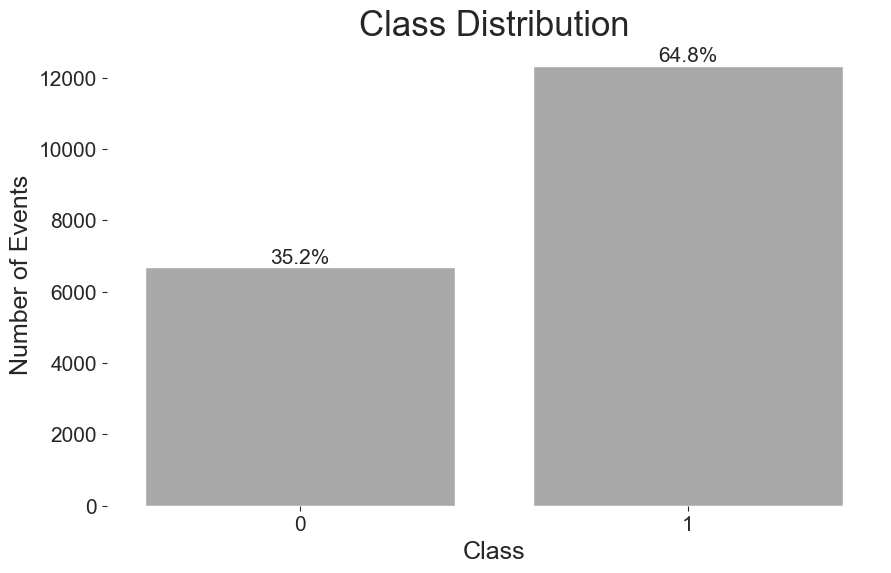

In [107]:
#target variable distribution visualization
plt.figure()
ax = sns.countplot(x='class', data=df, color="darkgray")
plt.title("Class Distribution", fontsize=25)
plt.xlabel("Class", fontsize=18)
plt.ylabel("Number of Events", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.despine(left=True, bottom=True)
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=15)
plt.show()

#### *Hadron noise is represented nearly 30% less than gamma-rays*

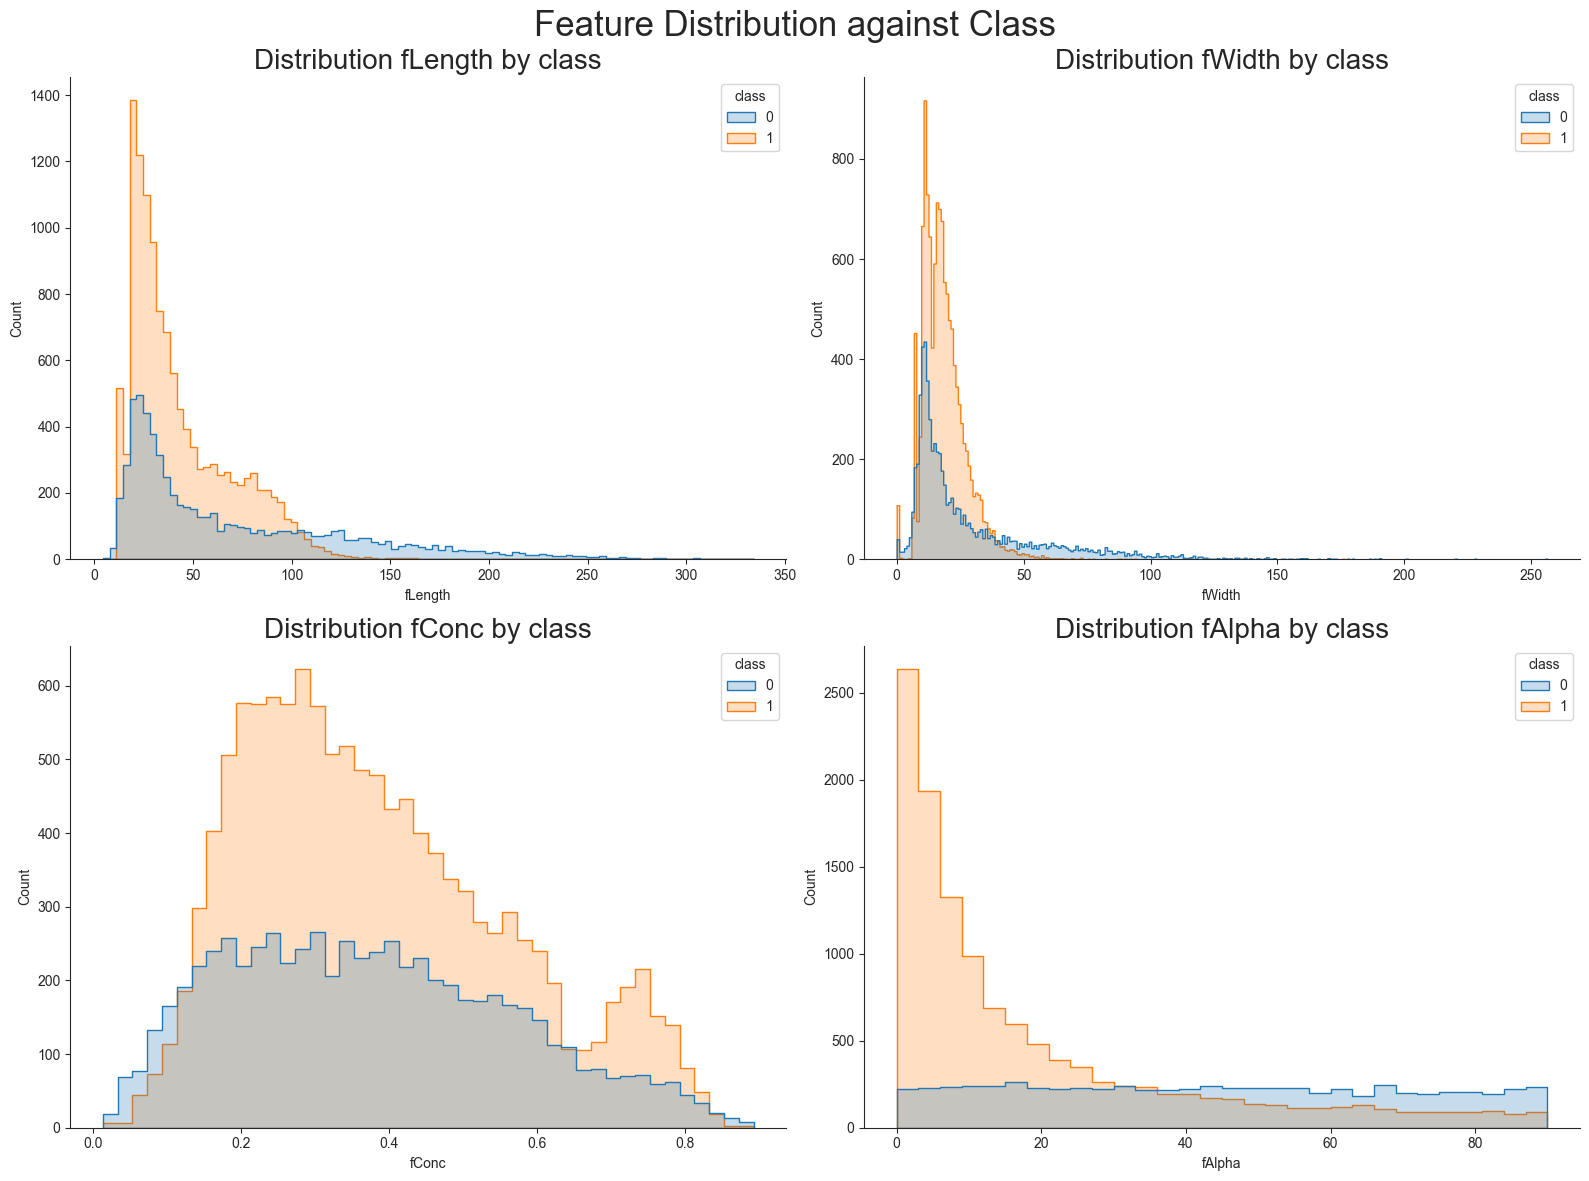

In [108]:
features_plot = ['fLength', 'fWidth', 'fConc', 'fAlpha']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_plot, 1):
    plt.subplot(2, 2, i )
    sns.histplot(data=df, x=feature, hue='class', element="step", common_norm=False)
    plt.title(f'Distribution {feature} by class', fontsize=20)
plt.suptitle('Feature Distribution against Class', fontsize=25)
sns.despine()
plt.tight_layout()
plt.show()

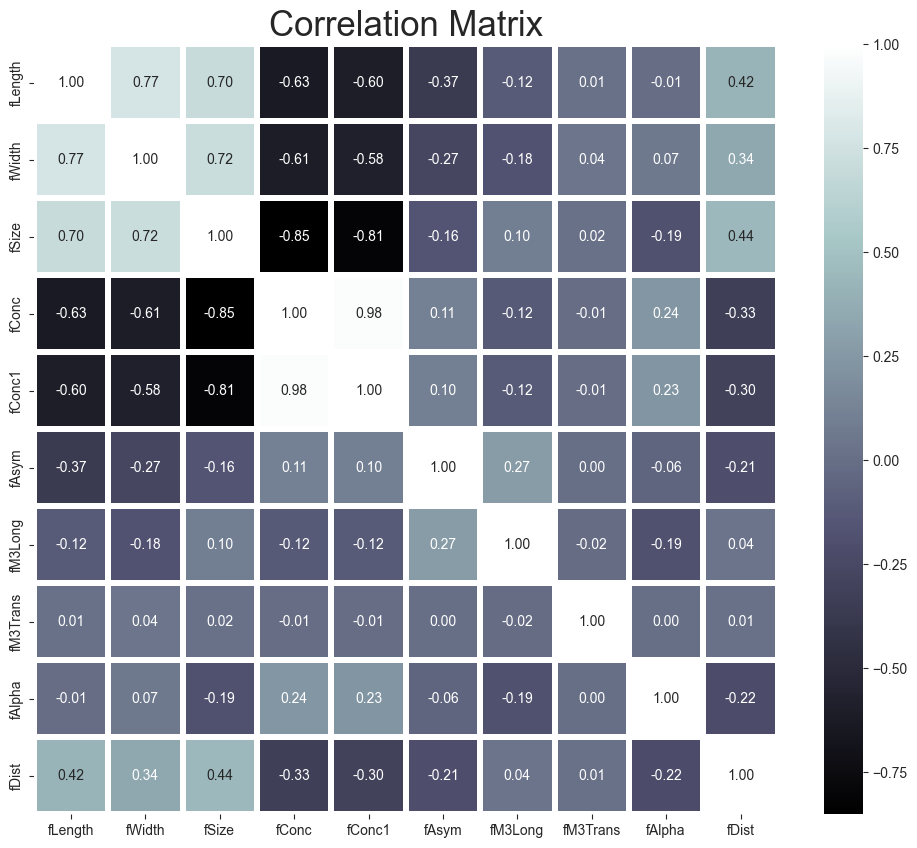

In [109]:
corr_df = df.drop('class', axis=1)
corr_matrix = corr_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=4, cmap='bone')
plt.title('Correlation Matrix', fontsize=25)
sns.despine(left=True, bottom=True)
plt.show()

# **Data Preparation**

In [110]:
#disconnecting the target variable
X = df.drop('class', axis=1)
y = df['class']

In [111]:
#training and temporary split (70 / 30)
x_train, x_temp, y_train, y_temp = train_test_split(X, y, random_state=56, stratify=y, test_size=0.3)

In [112]:
#validation split (15/15)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=56)

In [113]:
print(f"train : {x_train.shape} test : {x_test.shape} val : {x_val.shape}")

train : (13314, 10) test : (2853, 10) val : (2853, 10)


#### **!!! While Scaling was implemented it was done just to check if results will improve. It is commented as it does not always work with XGBoost with RandomSearchCV**

In [114]:
# #scaling features
# sscaler = StandardScaler()
# x_train_scaled = sscaler.fit_transform(x_train)
# x_val_scaled = sscaler.fit_transform(x_val)
# x_test_scaled = sscaler.fit_transform(x_test)

# **Model Development**

#### *For the baseline model XGBoost will be used along with random tuning approach with RandomizedSearchCV to extract best hyperparameters*

In [115]:
#creating hyperparameter grid
xgb_grid = {'learning_rate': [0.01, 0.1, 0.2],'max_depth': [3, 5, 7],
'n_estimators': [100, 200, 300],'subsample': [0.8, 0.9, 1.0],'colsample_bytree': [0.8, 0.9, 1.0],
'gamma': [0, 0.1, 0.2]}

In [116]:
#initializing xgb clf 
xgboost = XGBClassifier(objective='binary:logistic',random_state=56)

In [117]:
#initializing randomsearch shell
r_search_xgb = RandomizedSearchCV(xgboost, param_distributions=xgb_grid, cv=3, scoring='roc_auc', random_state=56, verbose=1, n_jobs=-1, n_iter=25)

In [118]:
#fitting the UNSCALED data
r_search_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


d:\miniconda3\envs\art-historian\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
  warnings.warn(


,estimator,"XGBClassifier...state=56, ...)"
,param_distributions,"{'colsample_bytree': [0.8, 0.9, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,25
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,56
,error_score,nan


In [119]:
best_xgb = r_search_xgb.best_estimator_

In [120]:
#best hyperparamters
print(best_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=56, ...)


In [121]:
best_xgb_params = r_search_xgb.best_params_

In [122]:
#initializing xgb clf with best hyperparameters
xgboost_best = XGBClassifier(objective='binary:logistic',random_state=56, **best_xgb_params)

In [123]:
xgboost_best.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [124]:
#predicting on the test set
y_pred_xgb = xgboost_best.predict(x_test)

In [125]:
cm = confusion_matrix(y_test, y_pred_xgb)

In [126]:
#creating confusion matrix dataframe
cm_df = pd.DataFrame(cm)

In [127]:
#classification report
print(classification_report(y_test, y_pred_xgb, target_names=['hadron (0)', 'gamma (1)']))

              precision    recall  f1-score   support

  hadron (0)       0.92      0.64      0.75      1003
   gamma (1)       0.83      0.97      0.90      1850

    accuracy                           0.85      2853
   macro avg       0.88      0.80      0.82      2853
weighted avg       0.86      0.85      0.85      2853



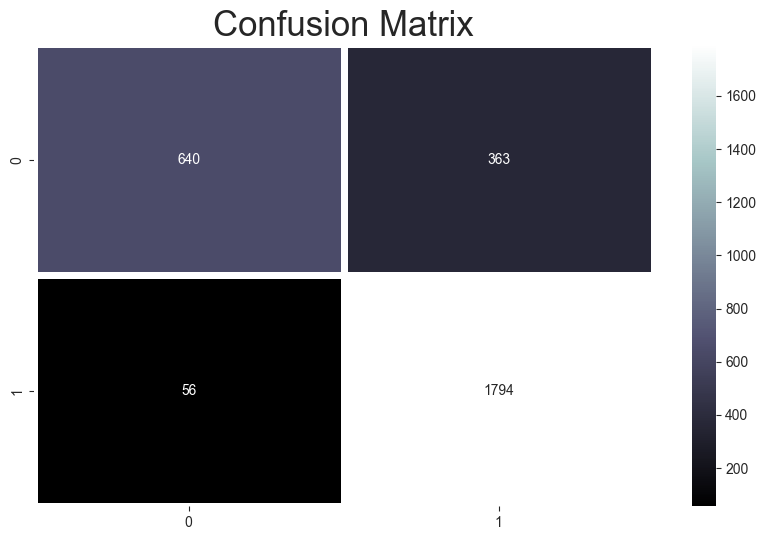

In [128]:
#confusion matrix visualization
plt.figure()
sns.heatmap(cm_df, annot=True, fmt='d', cmap='bone', linewidths=5)
plt.title('Confusion Matrix', fontsize=25)
sns.despine(left=True, bottom=True)
plt.show()

# **Deep Learning Model Development**

In [156]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import visualkeras

In [130]:
deep_model = keras.Sequential(
	[
   layers.Input(shape=(x_train.shape[1],)),
   layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
   layers.Dropout(0.24),
   layers.Dense(32, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
   layers.Dropout(0.34),
   layers.Dense(16, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
   layers.Dropout(0.34),
   layers.Dense(1, activation='sigmoid')
	]
)

In [131]:
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.AUC(name='auc')])

In [158]:
deep_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                704       
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [133]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [145]:
history = deep_model.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/300
209/209 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8107 - auc: 0.8697 - val_loss: 0.3996 - val_accuracy: 0.8314 - val_auc: 0.8948
Epoch 2/300
209/209 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8157 - auc: 0.8758 - val_loss: 0.4111 - val_accuracy: 0.8195 - val_auc: 0.8915
Epoch 3/300
209/209 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8140 - auc: 0.8731 - val_loss: 0.4000 - val_accuracy: 0.8283 - val_auc: 0.8963
Epoch 4/300
209/209 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8116 - auc: 0.8758 - val_loss: 0.3869 - val_accuracy: 0.8395 - val_auc: 0.8974
Epoch 5/300
209/209 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8136 - auc: 0.8767 - val_loss: 0.3917 - val_accuracy: 0.8335 - val_auc: 0.8954
Epoch 6/300
209/209 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8158 - auc: 0.8751 - val_loss

In [146]:
y_pred_deep = deep_model.predict(x_test).flatten()

90/90 [==============================] - 0s 742us/step


In [147]:
y_pred_deep = (y_pred_deep > 0.5).astype(int)

In [159]:
print(classification_report(y_test, y_pred_deep))

              precision    recall  f1-score   support

           0       0.86      0.64      0.74      1003
           1       0.83      0.94      0.88      1850

    accuracy                           0.84      2853
   macro avg       0.84      0.79      0.81      2853
weighted avg       0.84      0.84      0.83      2853



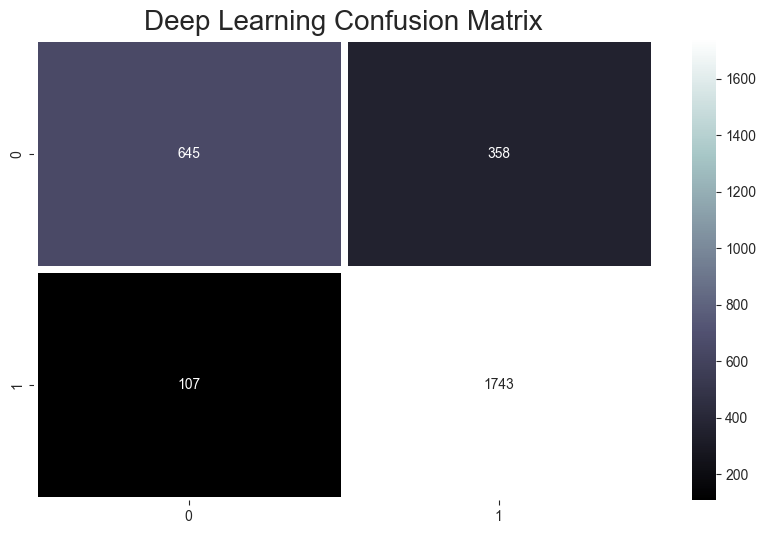

In [149]:
cm_deep = confusion_matrix(y_test, y_pred_deep)

plt.figure()
sns.heatmap(cm_deep, annot=True, fmt='d', cmap='bone', linewidths=5)
plt.title('Deep Learning Confusion Matrix', fontsize=20)
plt.show()

In [150]:
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_deep = classification_report(y_test, y_pred_deep, output_dict=True)

In [151]:
summary_data = {
    'Model': ['XGBoost (Baseline)', 'Keras(Deep Learning)'],
    'Accuracy': [report_xgb['accuracy'], report_deep['accuracy']],
    'AUC': [roc_auc_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_deep)],
    'F1-Score (gamma)': [report_xgb['1']['f1-score'], report_deep['1']['f1-score']],
    'Recall (gamma)': [report_xgb['1']['recall'], report_deep['1']['recall']]
}

In [152]:
summary_df = pd.DataFrame(summary_data).set_index('Model')

In [153]:
display(summary_df)

,Accuracy,AUC,F1-Score (gamma),Recall (gamma)
Model,,,,
XGBoost (Baseline),0.853137,0.803908,0.895433,0.969730
Keras(Deep Learning),0.837014,0.792616,0.882308,0.942162


In [154]:
summary_plot = summary_df.reset_index()

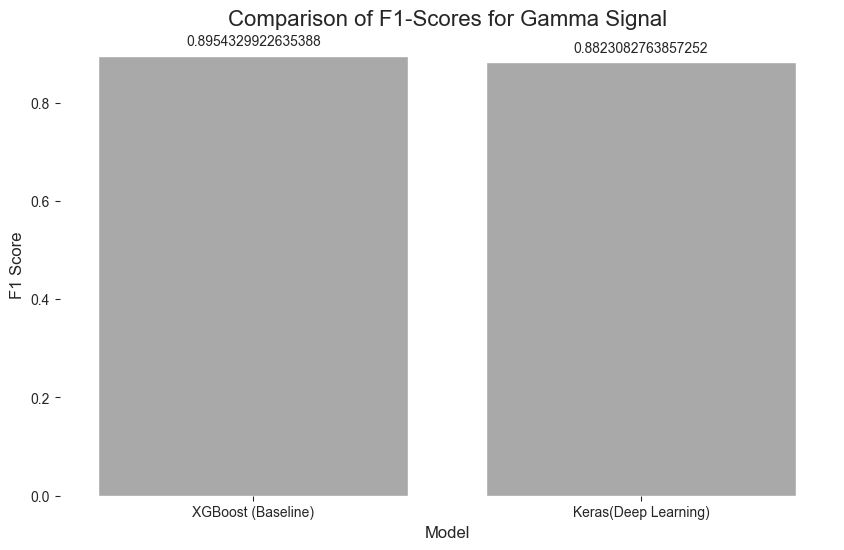

In [155]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='F1-Score (gamma)', data=summary_plot, color='darkgray')
plt.title('Comparison of F1-Scores for Gamma Signal', fontsize=16)
plt.ylabel('F1 Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
sns.despine(left=True, bottom=True)
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
  ha='center', va='center', xytext=(0, 10), textcoords='offset points')